In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 7)

tips = sns.load_dataset('tips')

# When is a Model a Good Model? (Inference)
---

A model fit for statistical inference is intended to explain the data generating process (or population) that the observed data represents. Such models should further quantify the *confidence* the description.

## Linear Regression

Statistical inference most commonly rely on linear models, as they are easy to interpret and provide powerful theoretical guarantees. While a linear model cannot directly capture complex relationships, they are still useful to quantify the relationship between well-chosen derived features. A complex data generating process can always be transformed to a simple linear relation using a clever choice of features, where a linear model is then used for statistical inference.

*Remark:* In practice, finding such derived features is difficult!

Recall that a linear regression model is the line of best fit for a given dataset. Below is a scatterplot of a sample dataset, along with the regression line:

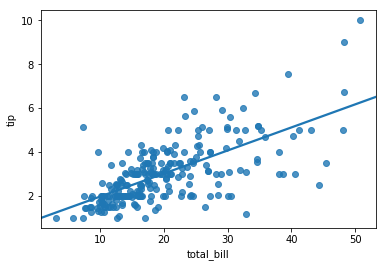

In [37]:
sns.regplot(data=tips, x='total_bill', y='tip', ci=None);

The linear model has slope 0.105 and intercept 0.92, positing about customer's tipping behavior:
> Customers tip 92&#162; with the purchase by default, then tip 10.5% of the total bill thereafter.

How *good* is this linear model? What are the ways to measure the model quality?

### Bias of a fit linear model

The bias of a linear model measures the average difference between the *estimated values* from the *true values of the population*. The linear regression line is the best linear unbiased estimator; on average, the errors (or residuals) cancel out. 

This property is visible in the *residual plot*, where the errors are evenly distributed above and below 0:

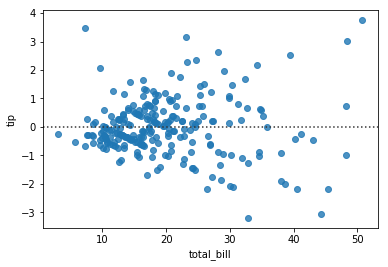

In [38]:
sns.residplot(data=tips, x='total_bill', y='tip');

In [39]:
from scipy.stats import linregress
lr = linregress(tips.total_bill, tips.tip) # linear regression model
preds = (tips.total_bill * lr.slope + lr.intercept)
resid = preds - tips.tip
resid.mean()

-3.8220792651029977e-16

### The quality of a fit linear model

Although on average the regression describes the relationship between the variables well, it's also useful to measure the cumulative error in the linear model. In fact, the linear regression line is computed as the line that minimizes the *root mean squared error* (RMSE). 

This notion of the standard deviation of the error is an easily interpretable quantity that reflects the quality of the model. In this case, the RMSE is approximately one dollar:

In [40]:
np.sqrt(np.mean((resid ** 2)))

1.0178504025697377

Considering the average tip in the dataset is \\$3, an RMSE of \\$1 is rather large amount. Such a result implies that, even if the linear model captures a trend, the actual values often differ substantially from those predicted by the model.

The RMSE is given in the same units as the dependent variable. While this makes the quantity easy to interpret, it also suffers from being dependent on those units. While changing the regression to Mexican Pesos would not change the *shape* of the regression plot, the RMSE would change substantially with the conversion rate.

A scale-free notion of goodness-of-fit is the *coefficient of determination*: how much variation in the dependent variable is explainable from (the independent variable under) the linear model.

**Definition:** The coefficient of determination is denoted $R^2$ and is computed as:

$$1 - \frac{\rm{var}(R(x) - Y)}{\rm{var}(Y)}$$

For a line of best fit, this quantity coincides with the correlation coefficent:
* If the regression line fits the data perfectly, then $R^2=1$.
* If the regression line is constant, the $R^2=0$

*Remark:* For a non-linear model, this value might be negative. In these cases, the model fits the data worse than a constant model.

### The appropriateness of a linear model

A linear regression model is an appropriate choice, if a number of conditions hold:

**Linearity:** The relationship between the independent variables and the dependent variables are approximately linear. This means that the observed data were generated by adding noise from a linear combination of the parameters:
$$R(x) = a_1x_1 + \ldots + a_nx_n + \epsilon$$
Where $\epsilon$ is random noise with mean 0.

In one variable, data showing a nonlinear shape can be determined by visual inspection. In higher dimensions, one relies on the test of the goodness-of-fit above. If the data show non-linear relationships, one can apply non-linear transformations of the features to linearize the relationships.

**Homoscedasticity:** The errors are roughly constant, so that the model's inferences are equally valid across all possible values of the independent variable. This is visible in a 'uneven spread' in the residual plot:

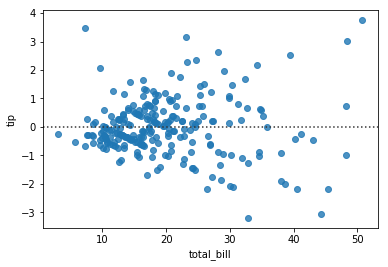

In [41]:
sns.residplot(tips.total_bill, tips.tip);

More precisely, one needs to check that the variance of the residuals across the independent variable is roughly constant. One way to check this condition is with *White's Test*: 
> Is the correlation of 'the square of the residuals' and the independent variable equal to 0?

A nonzero correlation implies that the variance of the errors is not constant. When this occurs, the data show *heteroscedasticity*. While this doesn't bias the regression model, it does affect the reliability of the model: a slightly different sample in the high variance regions might significantly change the regression coefficients. 

The regression plot below illustrates White's test. There's a clear non-zero correlation, implying the presence of heteroscedasticity.

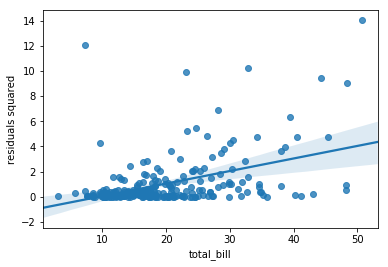

In [48]:
sns.regplot(x=tips.total_bill, y=(resid**2).rename('residuals squared'));

This variability is visible in the wide confidence bands at the right edge of the original regression plot:

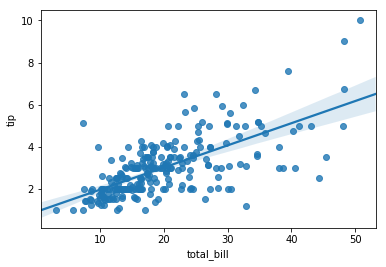

In [42]:
sns.regplot(tips.total_bill, tips.tip);

**No Multicollinearity:** In a multiple regression model, the presence of highly correlated independent variables affect the reliable of the regression model. Highly correlated features present multiple problems:

If one is interpreting the regression model as a relationship between each independent variable and the dependent variable, then highly correlated features makes it difficult to interpret which correlated variable has the 'strongest' effect on the dependent variable.

Perfectly correlated features result in an under-determined system of equations and multiple solutions to finding a 'plane of best fit'. A similar problem persists when features are merely highly correlated: a slightly different sample might drastically change the resulting regression coefficients, leading to unreliable results.